In [1]:
import config
import os, numpy as np, pandas, sklearn, scipy.signal as signal
import mido
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## NN libs
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
import keras
from keras import regularizers
from keras import backend as K, metrics
from keras.utils import to_categorical, plot_model
from keras.layers import Input, Dense, Activation, Conv1D, Conv2D, Dropout, Flatten, Lambda
from keras.layers import Conv2DTranspose, Reshape, MaxPooling2D, UpSampling2D, UpSampling1D, MaxPooling1D
from keras.layers import LocallyConnected1D, LocallyConnected2D
from keras.layers import Input, LSTM, RepeatVector
from keras.models import Model
from keras.callbacks import TensorBoard

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# local libs
import config, models, functions
from data import data, midi, midi_generators as g
from utils import io, models_io, utils

 Context :: namedtuple(
[ max_t = float
, dt = float
, n_instances = int
, note_length = int
, bpm = float
, tempo = float
, ticks_per_beat = int
]



In [4]:
context = data.init()
n = 2
multiTrack = False
context, x_train, labels = data.import_data(data.init(), n, multiTrack=multiTrack)

Setting up params

max min f 25.0 0.3333333333333333
 >> Context(max_t=3.0, dt=0.02, n_instances=150, note_length=0.03, bpm=120.0, tempo=500000, ticks_per_beat=480)
Setting up params

max min f 25.0 0.3333333333333333
 >> Context(max_t=3.0, dt=0.02, n_instances=150, note_length=0.03, bpm=120.0, tempo=500000, ticks_per_beat=480)
Importing midi-data

 [INFO] : 
 |  reading file: ../datasets/examples/01 16th Snare.mid
 [INFO] : 
 |  reading file: ../datasets/examples/01 8th Cym.mid

Encoding midi-data
 [<midi file '../datasets/examples/01 16th Snare.mid' type 0, 1 tracks, 182 messages>, <midi file '../datasets/examples/01 8th Cym.mid' type 0, 1 tracks, 68 messages>]
> -> multi-track = False
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.994791666666667
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.9947916666666665
 |>  150


In [85]:
n = 100
min_f = 3
max_f = 20
# x_train = g.gen_data(context, n, max_f=max_f, min_f=min_f)
x_train = g.gen_data_complex(context, n, max_f=max_f, min_f=min_f, multiTrack=multiTrack)
y_train = x_train

 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  3.004166666666667
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.993750000000001
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  3.008333333333333
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.990625000000003
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.992708333333336
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.995833333333336
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  3.007291666666666
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  3.008333333333334
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  3.0041666666666695
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.994791666666671
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  3.0093750000000026
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.993750000000003
 |>  150
 [DEBUG] > 
 |

 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  3.0010416666666666
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  3.010416666666667
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.993750000000002
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.995833333333334
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.9947916666666665
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.9989583333333365
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  3.003125
 |>  150
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.9947916666666665
 |>  150


In [86]:
x_train.shape

(279, 150, 1)

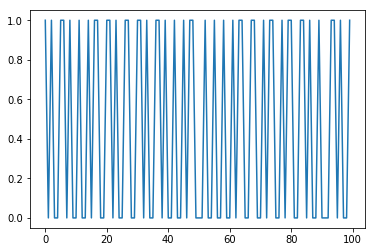

In [87]:
plt.plot(x_train[0,:100])

In [88]:
x_train.shape

(279, 150, 1)

In [89]:
n_samples = x_train[0]
input_shape = x_train.shape[1:] # shape of a single sample
output_shape = y_train.shape[1:] # shape of a single sample
# output_length = y_train.shape[1:][0]
hidden_layer_length = 150
input_shape

(150, 1)

In [90]:
output_shape

(150, 1)

In [91]:
num_encoder_tokens = x_train.shape[-1]
num_decoder_tokens = y_train.shape[-1]
# latent_dim = 1

In [92]:
k_reg = regularizers.l2(0.01) # 10e-5
# b_reg = regularizers.l1(0.01)
a_reg = regularizers.l1(0.01) # 10e-5

In [108]:
input_shape
# input_shape = (150,)
input_shape

(150, 1)

In [109]:
batch_size = 16
original_dim = 150
latent_dim = 150
intermediate_dim = 150
epsilon_std = 1.0

In [110]:
def sampling(args, latent_dim, epsilon_std):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0.,
                              stddev=epsilon_std)
    return z_mean + K.exp(z_log_var / 2) * epsilon

In [274]:
def encoder(latent_dim, input_shape, intermediate_dim = 150):
    encoder_input = Input(shape=input_shape, name='encoder_input')
    y = encoder_input
    y = Reshape(input_shape[:1])(y) # Flatten() nees 3 dims
    h = Dense(intermediate_dim, activation='relu', name='encoder_h')(y)
    z_mean = Dense(latent_dim, name='z_mean')(h) # , activation='relu'
    z_log_var = Dense(latent_dim, name='z_log_var')(h) # , activation='relu'

    encoder_output = [z_mean, z_log_var]
    encoder_model = Model(encoder_input, encoder_output, name='encoder_model')
    return encoder_model, z_mean, z_log_var, encoder_input

def z_(latent_dim, epsilon_std):
    # sample z from a distribution defined by [input_mean, input_log_var]
    # input :: [z_mean, z_log_var]
    z_input = [Input(shape=(latent_dim,)), Input(shape=(latent_dim,))]
    sampling_ = lambda args: sampling(args, latent_dim, epsilon_std)
    z_output = Lambda(sampling_, output_shape=(latent_dim,))(z_input)
    z_model = Model(z_input, z_output, name='z_model')
    return z_model

def decoder(latent_dim, input_shape, intermediate_dim = 150):
    z = Input(shape=(latent_dim,), name='decoder_input')
    decoder_h = Dense(intermediate_dim, activation='relu', name='decoder_h')
    h = decoder_h(z)
    decoder_mean = Dense(original_dim, activation='sigmoid', name='decoder_mean')
    x_decoded_mean = decoder_mean(h)
    h = Reshape(input_shape)(x_decoded_mean)
    decoder_output = h
    # x_decoded_mean = Reshape(input_shape)(x_decoded_mean)
    model = Model(inputs=z, outputs=decoder_output, name='decoder_model')
    return model

In [275]:
encoder_model, z_mean, z_log_var, encoder_input = encoder(latent_dim, input_shape)
z_model = z_(latent_dim, epsilon_std)
decoder_model = decoder(latent_dim, input_shape)

vae_input = Input(shape=input_shape)
# vae_input = encoder_input # WHY ?
vae_output = decoder_model(z_model(encoder_model(vae_input)))
# vae_output = decoder_model(z)
vae = Model(vae_input, vae_output)
# vae = Model(encoder_input, decoder_model(z))
# vae = Model(encoder_input, decoder_output)
encoder_model.summary()
z_model.summary()
# encoder_model_partial.summary()
decoder_model.summary()
vae.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 150, 1)       0                                            
__________________________________________________________________________________________________
reshape_66 (Reshape)            (None, 150)          0           encoder_input[0][0]              
__________________________________________________________________________________________________
encoder_h (Dense)               (None, 150)          22650       reshape_66[0][0]                 
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 150)          22650       encoder_h[0][0]                  
__________________________________________________________________________________________________
z_log_var 

In [276]:
# encoder_input = Input(shape=input_shape)
# y = encoder_input
# y = Reshape(input_shape[:1])(y) # Flatten() nees 3 dims
# # y = Flatten()(y)

# y = Dense(150, activation='relu')(y)
# encoder_output = y
# encoder_model = Model(encoder_input, encoder_output)
# encoder_model.summary()

# vae_input = encoder_input # WHY ?
# y_input = Input(shape=(150,))
# y = Dense(150)(y_input)
# y = Reshape(input_shape)(y)
# y_model = Model(y_input, y)
# y_model.summary()
# # y_input = [Input(shape=(latent_dim,)), Input(shape=(latent_dim,))]
# # y = Reshape(input_shape)(y_input[0])
# # y = keras.layers.Concatenate()(y_input)
# # decoder2 = Model(y_input, y)
# # decoder2.summary()
# vae_ouput = Input(shape=input_shape)
# vae_ouput = y_model(encoder_model(vae_input))
# vae = Model(vae_input, vae_ouput)
# vae.summary()

In [282]:
Flatten()(vae_output)

<tf.Tensor 'flatten_6/Reshape:0' shape=(?, ?) dtype=float32>

In [284]:
np.prod(input_shape) * keras.metrics.binary_crossentropy(Flatten()(vae_input), Flatten()(vae_output))

<tf.Tensor 'mul_26:0' shape=(?,) dtype=float32>

In [278]:
# xent_loss = original_dim * keras.metrics.binary_crossentropy(vae_input, vae_output)
# xent_loss = keras.metrics.binary_crossentropy(vae_input, vae_output)
xent_loss = np.prod(input_shape) * keras.metrics.binary_crossentropy(Flatten()(vae_input), Flatten()(vae_output))
# kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
# vae_loss = K.mean(xent_loss + kl_loss)
vae_loss = K.mean(xent_loss)

vae.add_loss(vae_loss)
vae.compile(optimizer='rmsprop')
# vae.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Output "decoder_model" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "decoder_model" during training.
  


In [262]:
# z_train = x_train
# x_train = x_train.reshape(x_train.shape[0],np.prod(x_train.shape[1:]))
x_train.shape

(109, 150, 1)

In [263]:
x_test = x_train[-10:]
x_train = x_train[:-10]

In [266]:
epochs = 100
m = 50
# , validation_data=(x_test, None)
history = vae.fit(x_train[:m], shuffle=False, epochs=epochs, batch_size=batch_size)

Epoch 1/100
50/50 [==============================] - 2s 31ms/step - loss: 0.7308
Epoch 2/100
50/50 [==============================] - 0s 289us/step - loss: 0.6820
Epoch 3/100
50/50 [==============================] - 0s 425us/step - loss: 0.6549
Epoch 4/100
50/50 [==============================] - 0s 533us/step - loss: 0.6491
Epoch 5/100
50/50 [==============================] - 0s 557us/step - loss: 0.6320
Epoch 6/100
50/50 [==============================] - 0s 577us/step - loss: 0.6255
Epoch 7/100
50/50 [==============================] - 0s 337us/step - loss: 0.6144
Epoch 8/100
50/50 [==============================] - 0s 389us/step - loss: 0.6005
Epoch 9/100
50/50 [==============================] - ETA: 0s - loss: 0.613 - 0s 363us/step - loss: 0.5939
Epoch 10/100
50/50 [==============================] - 0s 430us/step - loss: 0.5822
Epoch 11/100
50/50 [==============================] - 0s 566us/step - loss: 0.5704
Epoch 12/100
50/50 [==============================] - 0s 411us/step - los

50/50 [==============================] - 0s 445us/step - loss: 0.0013
Epoch 100/100
50/50 [==============================] - 0s 472us/step - loss: 0.0013


KeyError: 'val_loss'

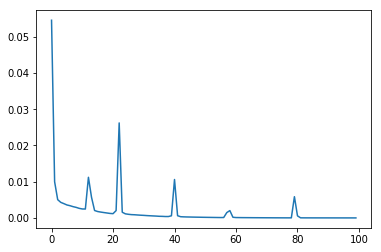

In [265]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
history.history.keys()

In [31]:
# plot_model(vae, to_file='model.png')

In [29]:
generator = decoder_model # decoder_model(z)
generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   (None, 150)               0         
_________________________________________________________________
decoder_h (Dense)            (None, 150)               22650     
_________________________________________________________________
decoder_mean (Dense)         (None, 150)               22650     
Total params: 45,300
Trainable params: 45,300
Non-trainable params: 0
_________________________________________________________________


In [171]:
k_reg = regularizers.l2(0.01)
# b_reg = regularizers.l1(0.01)
a_reg = regularizers.l1(0.01)

encoder_input = Input(shape=input_shape)
y = encoder_input
y = Reshape(input_shape[:1])(y) # Flatten() nees 3 dims
y = Dense(150, activation='relu')(y)
encoder_output = y
encoder_model = Model(encoder_input, encoder_output)
encoder_model.summary()

vae_input = encoder_input # WHY ?
y_input = Input(shape=(150,))
y = Dense(150)(y_input)
y = Reshape(input_shape)(y)
y_model = Model(y_input, y)
y_model.summary()
# y_input = [Input(shape=(latent_dim,)), Input(shape=(latent_dim,))]
# y = Reshape(input_shape)(y_input[0])
# y = keras.layers.Concatenate()(y_input)
# decoder2 = Model(y_input, y)
# decoder2.summary()
vae_ouput = Input(shape=input_shape)
vae_ouput = y_model(encoder_model(vae_input))
vae = Model(vae_input, vae_ouput)
vae.summary()

def encoder(input_shape, output_length, dropout=0.10):
    input_layer = Input(shape=input_shape)
    x = input_layer
    x = Flatten()(x)
#     x = Dense(1000, activation='relu')(x)
    x = Dense(150, activation='relu')(x)
    
#     x = Dense(150, activation='relu', kernel_regularizer=k_reg, activity_regularizer=a_reg)(x)

#     x = Dense(1000, activation='relu')(x)
#     x = Dense(1000, activation='relu')(x)
#     x = Dropout(dropout)(x)
    
#     x = Dense(100, activation='relu')(x)
#     x = Dense(100, activation='relu')(x)
#     x = Dropout(dropout)(x)

    x = Dense(output_length, activation='relu')(x)
#     x = Dense(output_length, activation='relu', activity_regularizer=regularizers.l1(10e-5))(x)
    model = Model(inputs=input_layer, outputs=x)
    return model


def decoder(input_length, output_shape, dropout=0.10):
    input_layer = Input(shape=(input_length,))
    x = input_layer
    shape = output_shape
    # shape = (10,100) # increase n dimensions
    
    x = Dense(150, activation='relu')(x)
#     x = Dense(150, activation='relu')(x)    

    x = Dense(np.prod(shape), activation='sigmoid')(x)
    x = Reshape(shape)(x)
    model = Model(inputs=input_layer, outputs=x)
    return model


def autoencoder(input_shape, output_shape, hidden_layer_length=10, dropout=0.10, verbose=False):
    input_ = Input(shape=input_shape)
    encode = encoder(input_shape, hidden_layer_length, dropout)
    if verbose:
        encode.summary()
    decode = decoder(hidden_layer_length, output_shape, dropout)
    if verbose:
        decode.summary()
    model = Model(input_, decode(encode(input_)))
    return encode, decode, model

dropout = 0.2
encoder, decoder, model = autoencoder(input_shape, output_shape, hidden_layer_length, dropout, True)

w1 300 w2 600
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_71 (InputLayer)        (None, 150, 1)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 150)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_12 (Dense)             (None, 150)               22650     
Total params: 45,300
Trainable params: 45,300
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_72 (InputLayer)        (None, 150)               0         
__________________________________________________________

In [176]:
model = vae

In [177]:
metrics = ['accuracy','mse','binary_crossentropy'] # sparse_categorical_accuracy
loss = 'binary_crossentropy'# binary_crossentropy categorical_crossentropy sparse_categorical_crossentropy
optimizer = 'adam' # adam adadelta rmsprop nadam
# keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
model.compile(optimizer=optimizer, loss=loss, metrics=['mse', 'mae', 'accuracy'])#, metrics=metrics)

In [178]:
batch_size = 16
# n epochs = n iterations over all the training data
epochs = 10

In [179]:
callbacks = []
callbacks = [TensorBoard(log_dir=config.tmp_log_dir)]
vs = 1/6
m = 100
# model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[TensorBoard(log_dir=config.tmp_log_dir)])
history = model.fit(x_train[:m],x_train[:m], epochs=epochs, batch_size=batch_size,
          validation_split=vs, callbacks=callbacks)

Train on 83 samples, validate on 17 samples
Epoch 1/10


InvalidArgumentError: You must feed a value for placeholder tensor 'encoder_input_17' with dtype float and shape [?,150,1]
	 [[Node: encoder_input_17 = Placeholder[dtype=DT_FLOAT, shape=[?,150,1], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'encoder_input_17', defined at:
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/asyncio/base_events.py", line 421, in run_forever
    self._run_once()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/asyncio/base_events.py", line 1431, in _run_once
    handle._run()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 117, in _handle_events
    handler_func(fileobj, events)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-141-2f582f57fe49>", line 1, in <module>
    encoder_model, z_mean, z_log_var, encoder_input = encoder(latent_dim, input_shape)
  File "<ipython-input-114-4e5e68ca4aa5>", line 2, in encoder
    encoder_input = Input(shape=input_shape, name='encoder_input')
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/engine/topology.py", line 1457, in Input
    input_tensor=tensor)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/engine/topology.py", line 1366, in __init__
    name=self.name)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 507, in placeholder
    x = tf.placeholder(dtype, shape=shape, name=name)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1680, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 3141, in _placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3160, in create_op
    op_def=op_def)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1625, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'encoder_input_17' with dtype float and shape [?,150,1]
	 [[Node: encoder_input_17 = Placeholder[dtype=DT_FLOAT, shape=[?,150,1], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

In [ ]:
plt.plot(x_train[0,:100,:])

In [ ]:
result.shape

In [ ]:
n1 = 30
i = 0
plt.subplot(211)
plt.plot(np.arange(n1), results[i][:n1])
plt.plot([0.5] * n1) # midi.MIDI_NOISE_FLOOR
plt.ylim(ymin=0, ymax=1)
plt.subplot(212)

plt.plot(np.arange(n1), x_train[i, :n1])
plt.plot([0.5] * n1) # midi.MIDI_NOISE_FLOOR
plt.ylim(ymin=0, ymax=1)

In [ ]:
mid = midi.decode_track(context, result)
dn = config.dataset_dir
# io.export_midifile(mid, dn + 'song_seq-seq.mid')

In [ ]:
results = []
latent_samples = []
for seq in x_test[-2:]:
    encoded = encode_sequence(np.stack([seq]))
    latent_samples.append(encoded)
    result = decode_sequence(encoded, encoder_model, decoder_model)
    results.append(result)
results[0].shape

In [ ]:
len(encoded)

In [ ]:
encoded[0].shape

In [ ]:
plt.plot(encoded[0][0,:10])
plt.plot(encoded[1][0,:10])

In [ ]:
e = np.array(latent_samples)
e.shape

In [ ]:
# reduce dimensionality
# e = e.reshape(e.shape[0],2,e.shape[-1])
e.shape

In [ ]:
e1.mean(axis=0).shape

In [ ]:
# new = e.transpose().mean(axis=1).transpose()
e1 = e[:,0] # state h
e2 = e[:,1] # state c
new = [e1.mean(axis=0), e2.mean(axis=0)]
# new = [[e[:,i].mean(axis=0)] for i in [0,1]]
plt.plot(new[0][0][:10])
len(new)

In [ ]:
e1.mean(axis=0).shape

In [ ]:
l[0].shape

In [ ]:
l = latent_samples[0]
len(l) # latent_sample :: (x,1,64)

In [ ]:
# new_ = decode_sequence(latent_samples[0], encoder_model, decoder_model)
new_ = decode_sequence(new, encoder_model, decoder_model)

In [ ]:
new_.shape

In [ ]:
plt.plot(new_[:100])

In [ ]:
plt.plot(results[0][:100])

In [ ]:
# results[0]

In [ ]:
mid_new = midi.decode_track(context, results[0])
io.export_midifile(mid_new, config.export_dir + 'real_mid_new_lstm.mid')

In [ ]:
x_test.shape

In [ ]:
# x_test, y_test = gen_xy_sin_to_f(3, f=2)

In [ ]:
results = model.predict([x_test,x_test])
results.shape

In [ ]:
# the 'true' results
i = 0
selection = int(x_test.shape[1] * 1)
full = np.concatenate([x_test[i,-selection:],y_test[i]])
n3 = full.shape[0]
plt.plot(np.arange(n3) / n3 * dt, full)

In [ ]:
# predicted results
i = 0
full = np.concatenate([x_test[i,-selection:],results[i]])
n3 = full.shape[0]
plt.plot(np.arange(n3) / n3 * dt, full)

In [ ]:
i = 2
selection = int(x_test.shape[1] * 1)
full = np.concatenate([x_test[i,-selection:],results[i]])
n3 = full.shape[0]
plt.plot(np.arange(n3) / n3 * dt, full)

In [ ]:
i = 0
selection = 1
full = np.concatenate([x_test[i,-selection:],results[i]])
n3 = full.shape[0]
plt.plot(np.arange(n3) / n3 * dt, full)